# regional_attribution_plotter.ipynb

#### Robbie Peal October 2024

- We plot the attribution at each grid cell

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import sys
print("appending tct path to the path...")
sys.path.append("/home/atuin/c104fa/c104fa10/utils")
print("importing tctools...")
import tctools2 as tct
print("done")
import pandas as pd
import pyproj
pyproj.datadir.set_data_dir("/home/atuin/c104fa/c104fa10/software/conda/envs/atmos_sci/share/proj") ## This line is needed to allow geopandas imports
import geopandas as gpd

# # Normalize and cluster directly with Dask
# from dask_ml.preprocessing import StandardScaler as DaskScaler
# from dask_ml.cluster import KMeans as DaskKMeans

appending tct path to the path...
importing tctools...


/home/atuin/c104fa/c104fa10/software/conda/envs/atmos_sci/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


done


#### Loading the data

In [2]:
## User options ##
months = np.arange(1,13)
nmonths = len(months)
chartType = "amount"
##################

## Automatically generated vars based on user imnput
dataSaveLoc = f"flattened_data2_{chartType}.npy" # Processing takes a long time so the location to store flattened data to before we begin clustering
path=  f"/home/atuin/c104fa/c104fa10/utils/attribution/attributor/attributed_amounts/{chartType}_months_MJOFull_tcv3.ERA5_wetThresh_" # path for loading original data from

if chartType == "wetDays":
    titlestr = "Wet days"
elif chartType == "p90Days":
    titlestr = "P90 precipitation days"
elif chartType == "amount":
    titlestr = "Precipitation amount"
else:
    raise ValueError("Wrong chartType")
####################################################

dataList = []
for month in months:
    fstr = f"{path}{month:02}.nc"
    print(f"Loading from {fstr}")
    # with open(fstr, "rb") as f:
    #     dataList.append(pickle.load(f))
    dataList.append(xr.open_dataset(fstr))

sioState = pd.read_csv("/home/atuin/c104fa/c104fa10/utils/swio_state/swio_state2.csv",parse_dates=[0])


Loading from /home/atuin/c104fa/c104fa10/utils/attribution/attributor/attributed_amounts/amount_months_MJOFull_tcv3.ERA5_wetThresh_01.nc
Loading from /home/atuin/c104fa/c104fa10/utils/attribution/attributor/attributed_amounts/amount_months_MJOFull_tcv3.ERA5_wetThresh_02.nc
Loading from /home/atuin/c104fa/c104fa10/utils/attribution/attributor/attributed_amounts/amount_months_MJOFull_tcv3.ERA5_wetThresh_03.nc
Loading from /home/atuin/c104fa/c104fa10/utils/attribution/attributor/attributed_amounts/amount_months_MJOFull_tcv3.ERA5_wetThresh_04.nc
Loading from /home/atuin/c104fa/c104fa10/utils/attribution/attributor/attributed_amounts/amount_months_MJOFull_tcv3.ERA5_wetThresh_05.nc
Loading from /home/atuin/c104fa/c104fa10/utils/attribution/attributor/attributed_amounts/amount_months_MJOFull_tcv3.ERA5_wetThresh_06.nc
Loading from /home/atuin/c104fa/c104fa10/utils/attribution/attributor/attributed_amounts/amount_months_MJOFull_tcv3.ERA5_wetThresh_07.nc
Loading from /home/atuin/c104fa/c104fa10/

- Now the data is loaded we can combine it and reduce it to the shapefile area

In [4]:
for i in range(len(dataList)):
#     dataList[i] = dataList[i].rename(favourable="f",unfavourable="u",inactive="i")
    dataList[i] = dataList[i].assign_coords(attribution=['tc_w', 'noTC_w', 'tc_500', 'none'])
dataList[0]

<xarray.Dataset>
Dimensions:      (longitude: 497, latitude: 309, attribution: 4)
Coordinates:
  * longitude    (longitude) float32 -22.0 -21.75 -21.5 ... 101.5 101.8 102.0
  * latitude     (latitude) float32 40.0 39.75 39.5 39.25 ... -36.5 -36.75 -37.0
  * attribution  (attribution) <U6 'tc_w' 'noTC_w' 'tc_500' 'none'
Data variables:
    p0           (attribution, latitude, longitude) float32 ...
    p1           (attribution, latitude, longitude) float32 ...
    p2           (attribution, latitude, longitude) float32 ...
    p3           (attribution, latitude, longitude) float32 ...
    p4           (attribution, latitude, longitude) float32 ...
    p5           (attribution, latitude, longitude) float32 ...
    p6           (attribution, latitude, longitude) float32 ...
    p7           (attribution, latitude, longitude) float32 ...
    p8           (attribution, latitude, longitude) float32 ...

In [5]:
MJO_classVals = np.array(list(dataList[0].keys()))
attributionTypes = dataList[0].attribution.values

In [6]:
arrList = []
for i in range(len(dataList)):
    data = dataList[i]
    arrList.append(data.to_dataarray().rename(variable="MJO_class"))

data = xr.concat(arrList,dim=pd.Index(months,name="month"))

Text(0.5, 1.0, 'Data area')

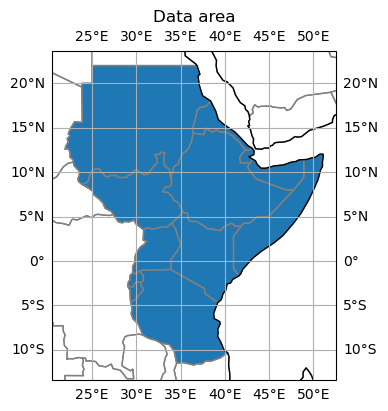

In [7]:
shapeFilePath = '/home/atuin/c104fa/c104fa10/data/shapefiles/EEA.shp'
EEA_gdf = gpd.read_file(shapeFilePath)
# Plot the area
fig, ax = tct.new_map_axes()
EEA_gdf.plot(ax=ax,categorical=True,legend=False)
ax.set_title("Data area")

In [8]:
EEAdata = tct.geo_subset(EEA_gdf,data).drop_vars("spatial_ref")
EEAdata

<xarray.DataArray (month: 12, MJO_class: 9, attribution: 4, latitude: 135,
                   longitude: 117)>
array([[[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
...
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]]]], dtype=float32)
Coordinates:
  * longitude    (longitude) float32 22.0 22.25 22.5 22.75 ... 50.5 50.75 51.0
  * latitude     (latitude) float32 22.0 21.75 21.5 21.25 ... -11.0 -11.25 -11.5
  * attribution  (attribution) <U6 'tc_w' 'noTC_w' 'tc_500' 'none'
  * MJO_class    (MJO_class) object 'p0' 'p1' 'p2' 'p3' 'p4' 'p5' 'p6' 'p7' 'p8'
  * month        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

Seasonal averages

<xarray.DataArray (month: 12, MJO_category: 3, attribution: 4, latitude: 135,
                   longitude: 117)>
array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
...
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0

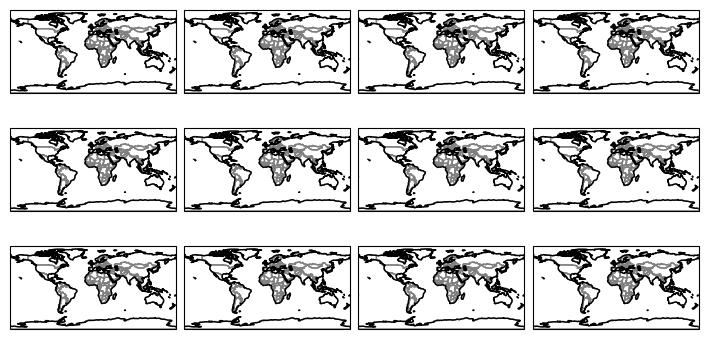

In [12]:
mm = 1/25.4

seasonNames = ["JF","MAM","JJAS","OND"]
seasonBnds = [[1,2],[3,5],[6,9],[10,12]]
titles = [f"Precipitation attribution amounts in {seasonName}" for seasonName in seasonNames]
saveLocs = [f"amount_region_tcv3.ERA5_wetThresh_{seasonName}" for seasonName in seasonNames]

# Define mapping for MJO classes
MJO_classes = {
    'inactive': ['p0'],
    'favourable': ['p2', 'p3', 'p4'],
    'unfavourable': ['p1', 'p5', 'p6', 'p7', 'p8']
}

# Reverse the dictionary to create a mapping from each MJO_class to its class category
MJO_class_mapping = {mjo_phase: category for category, phases in MJO_classes.items() for mjo_phase in phases}

# Create a new coordinate 'MJO_category' based on the mapping
EEAdata = EEAdata.assign_coords(MJO_category=("MJO_class", [MJO_class_mapping[mjo] for mjo in EEAdata['MJO_class'].values]))

# Group by the new 'MJO_category' coordinate and sum along the 'MJO_class' dimension
grouped_data = EEAdata.groupby('MJO_category').sum(dim="MJO_class")

print(grouped_data)

# Make plot
fig,axs = tct.new_map_axes(nrows=len(MJO_classes.items()),ncols=len(seasonBnds),figsize=(177*mm,90*mm),gridlines=False)

# for iseason in range(len(seasonNames)):
#     seasonBnd = seasonBnds[iseason]
#     saveLoc = saveLocs[iseason]
#     # Calculate the average contribution at each grid point for each season
#     seasonEEAdata = EEAdata.sel(month=slice(seasonBnd[0],seasonBnd[1]))
#     seasonEEAdata=seasonEEAdata.mean(dim="month")

#     print(f"Working on season {seasonNames[iseason]}")

#     # Sum the total precip in each MJO phase
#     total = seasonEEAdata.sum(dim='attribution')
#     frac = seasonEEAdata / total

#     # Convert to mm
#     if chartType == "amount":
#         total *=1000
    
#     # Combined westerly contribution
#     westerly = frac.sel(attribution='tc_w') + frac.sel(attribution='noTC_w')

#     att = ['tc_w', 'noTC_w', 'none']



#     mjo = MJO_classVals
#     mjoLong = mjo #["favourable","unfavourable","inactive"]

#     cmap = plt.get_cmap('viridis')
#     fracLevels = np.arange(0,1.05,0.1)

#     if chartType == "amount":
#         totalLabel = "average monthly precip mm"
#         totalTitle = "Monthly total"
#         totalVmax = 100
#         suptitle=titles[iseason]
#     elif chartType == "wetDays":
#         totalLabel = "average wet days per month"
#         totalTitle = "Wet days"
#         totalVmax=9
#         suptitle=titles[iseason]
#     else:
#         raise ValueError("Wrong value to 'chartType'")

#     for j in range(len(MJO_classVals)):
#         for i in range(len(att)):
#             ax = axs[i,j]
#             frac.sel(MJO_class=mjo[i],attribution=att[j]).plot.contourf(ax=ax,levels=fracLevels,add_colorbar=False,cmap=cmap)
#             if i==0:
#                 ax.set_title(att[j],fontweight='bold')
#             else:
#                 ax.set_title(None)
#             if j == 0:
#                 ax.text(-0.5,0.5,mjoLong[i],transform=ax.transAxes,size=12,fontweight="bold",rotation=90,va="center")

#         ax = axs[i,-2]
#         imFrac=westerly.sel(MJO_class=mjo[i]).plot.contourf(ax=ax,levels=fracLevels,add_colorbar=False,cmap=cmap)
#         ax.set_title(None)

#         ax = axs[i,-1]
#         imTot=total.sel(MJO_class=mjo[i]).plot.contourf(ax=ax,vmin=0,vmax=totalVmax,add_colorbar=False,cmap=plt.get_cmap("Blues"))
#         ax.set_title(None)
#     axs[0,-1].set_title(totalTitle,fontweight='bold')

#     axs[0,-2].set_title('all_w',fontweight='bold')
#     plt.colorbar(imFrac,ax=axs[:,:-1],shrink=0.6,label="fraction")
#     plt.colorbar(imTot,ax=axs[:,-1],shrink=0.6,label=totalLabel)

#     # tct.add_labels(axs,0.8,0.9,fontweight="bold")

#     fig.suptitle(suptitle)

# #     print(f"Saving to {saveLoc}")
# #     plt.savefig(f"{saveLoc}.png", dpi=300)
# #     plt.savefig(f"{saveLoc}.pdf", dpi=300)
# #     plt.savefig(f"{saveLoc}.eps",format='eps', dpi=300)

In [ ]:
mm = 1/25.4

seasonNames = ["JF","MAM","JJAS","OND"]
seasonBnds = [[1,2],[3,5],[6,9],[10,12]]
titles = [f"Precipitation attribution amounts in {seasonName}" for seasonName in seasonNames]
saveLocs = [f"amount_region_tcv3.ERA5_wetThresh_{seasonName}" for seasonName in seasonNames]
MJOClasses = {}

for iseason in range(len(seasonNames)):
    seasonBnd = seasonBnds[iseason]
    saveLoc = saveLocs[iseason]
    # Calculate the average contribution at each grid point for each season
    seasonEEAdata = EEAdata.sel(month=slice(seasonBnd[0],seasonBnd[1]))
    seasonEEAdata=seasonEEAdata.mean(dim="month")

    print(f"Working on season {seasonNames[iseason]}")

    # Sum the total precip in each MJO phase
    total = seasonEEAdata.sum(dim='attribution')
    frac = seasonEEAdata / total

    # Convert to mm
    if chartType == "amount":
        total *=1000
    
    # Combined westerly contribution
    westerly = frac.sel(attribution='tc_w') + frac.sel(attribution='noTC_w')

    att = ['tc_w', 'noTC_w', 'none']

    # Make plot
    fig,axs = tct.new_map_axes(nrows=len(MJO_classVals),ncols=len(att)+2,figsize=(177*mm,90*mm),gridlines=False)

    mjo = MJO_classVals
    mjoLong = mjo #["favourable","unfavourable","inactive"]

    cmap = plt.get_cmap('viridis')
    fracLevels = np.arange(0,1.05,0.1)

    if chartType == "amount":
        totalLabel = "average monthly precip mm"
        totalTitle = "Monthly total"
        totalVmax = 100
        suptitle=titles[iseason]
    elif chartType == "wetDays":
        totalLabel = "average wet days per month"
        totalTitle = "Wet days"
        totalVmax=9
        suptitle=titles[iseason]
    else:
        raise ValueError("Wrong value to 'chartType'")

    for j in range(len(MJO_classVals)):
        for i in range(len(att)):
            ax = axs[i,j]
            frac.sel(MJO_class=mjo[i],attribution=att[j]).plot.contourf(ax=ax,levels=fracLevels,add_colorbar=False,cmap=cmap)
            if i==0:
                ax.set_title(att[j],fontweight='bold')
            else:
                ax.set_title(None)
            if j == 0:
                ax.text(-0.5,0.5,mjoLong[i],transform=ax.transAxes,size=12,fontweight="bold",rotation=90,va="center")

        ax = axs[i,-2]
        imFrac=westerly.sel(MJO_class=mjo[i]).plot.contourf(ax=ax,levels=fracLevels,add_colorbar=False,cmap=cmap)
        ax.set_title(None)

        ax = axs[i,-1]
        imTot=total.sel(MJO_class=mjo[i]).plot.contourf(ax=ax,vmin=0,vmax=totalVmax,add_colorbar=False,cmap=plt.get_cmap("Blues"))
        ax.set_title(None)
    axs[0,-1].set_title(totalTitle,fontweight='bold')

    axs[0,-2].set_title('all_w',fontweight='bold')
    plt.colorbar(imFrac,ax=axs[:,:-1],shrink=0.6,label="fraction")
    plt.colorbar(imTot,ax=axs[:,-1],shrink=0.6,label=totalLabel)

    # tct.add_labels(axs,0.8,0.9,fontweight="bold")

    fig.suptitle(suptitle)

    print(f"Saving to {saveLoc}")
    # plt.savefig(f"{saveLoc}.png", dpi=300)
    # plt.savefig(f"{saveLoc}.pdf", dpi=300)
    # plt.savefig(f"{saveLoc}.eps",format='eps', dpi=300)

array([0.0000000e+00, 1.9011264e-04, 2.1912174e-04, ..., 7.6338685e-01,
       1.0000000e+00,           nan], dtype=float32)

In [ ]:
seasonEEAdata

<xarray.DataArray (MJO_class: 9, attribution: 4, latitude: 135, longitude: 117)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * longitude    (longitude) float32 22.0 22.25 22.5 22.75 ... 50.5 50.75 51.0
  * latitude     (latitude) float32 22.0 21.75 21.5 21.25 ... -11.0 -11.25 -11.5
  * attribution  (attribution) <U6 'tc_w' 'noTC_w' 'tc_500' 'none'
  * MJO_class    (MJO_class) object 'p0' 'p1' 'p2' 'p3' 'p4' 'p5' 'p6' 'p7' 'p8'

In [ ]:
seasonEEAdata = EEAdata.sel(month=slice(1,2))
# seasonEEAdata=seasonEEAdata.mean(dim="month")
seasonEEAdata

<xarray.DataArray (month: 2, MJO_class: 9, attribution: 4, latitude: 135,
                   longitude: 117)>
array([[[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
...
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]]]], dtype=float32)
Coordinates:
  * longitude    (longitude) float32 22.0 22.25 22.5 22.75 ... 50.5 50.75 51.0
  * latitude     (latitude) float32 22.0 21.75 21.5 21.25 ... -11.0 -11.25 -11.5
  * attribution  (attribution) <U6 'tc_w' 'noTC_w' 'tc_500' 'none'
  * MJO_class    (MJO_class) object 'p0' 'p1' 'p2' 'p3' 'p4' 'p5' 'p6' 'p7' 'p8'
  * month        (month) int64 1 2

In [ ]:
total = seasonEEAdata.sum(dim='attribution')
frac = seasonEEAdata / total
if chartType == "amount":
    total *=1000
total

<xarray.DataArray (MJO_class: 9, latitude: 135, longitude: 117)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 22.0 22.25 22.5 22.75 ... 50.5 50.75 51.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... -11.0 -11.25 -11.5
  * MJO_class  (MJO_class) object 'p0' 'p1' 'p2' 'p3' 'p4' 'p5' 'p6' 'p7' 'p8'

In [ ]:
westerly = frac.sel(attribution='tc_w') + frac.sel(attribution='noTC_w')

Text(0.5, 0.98, 'Precipitation attribution amounts in January/February')

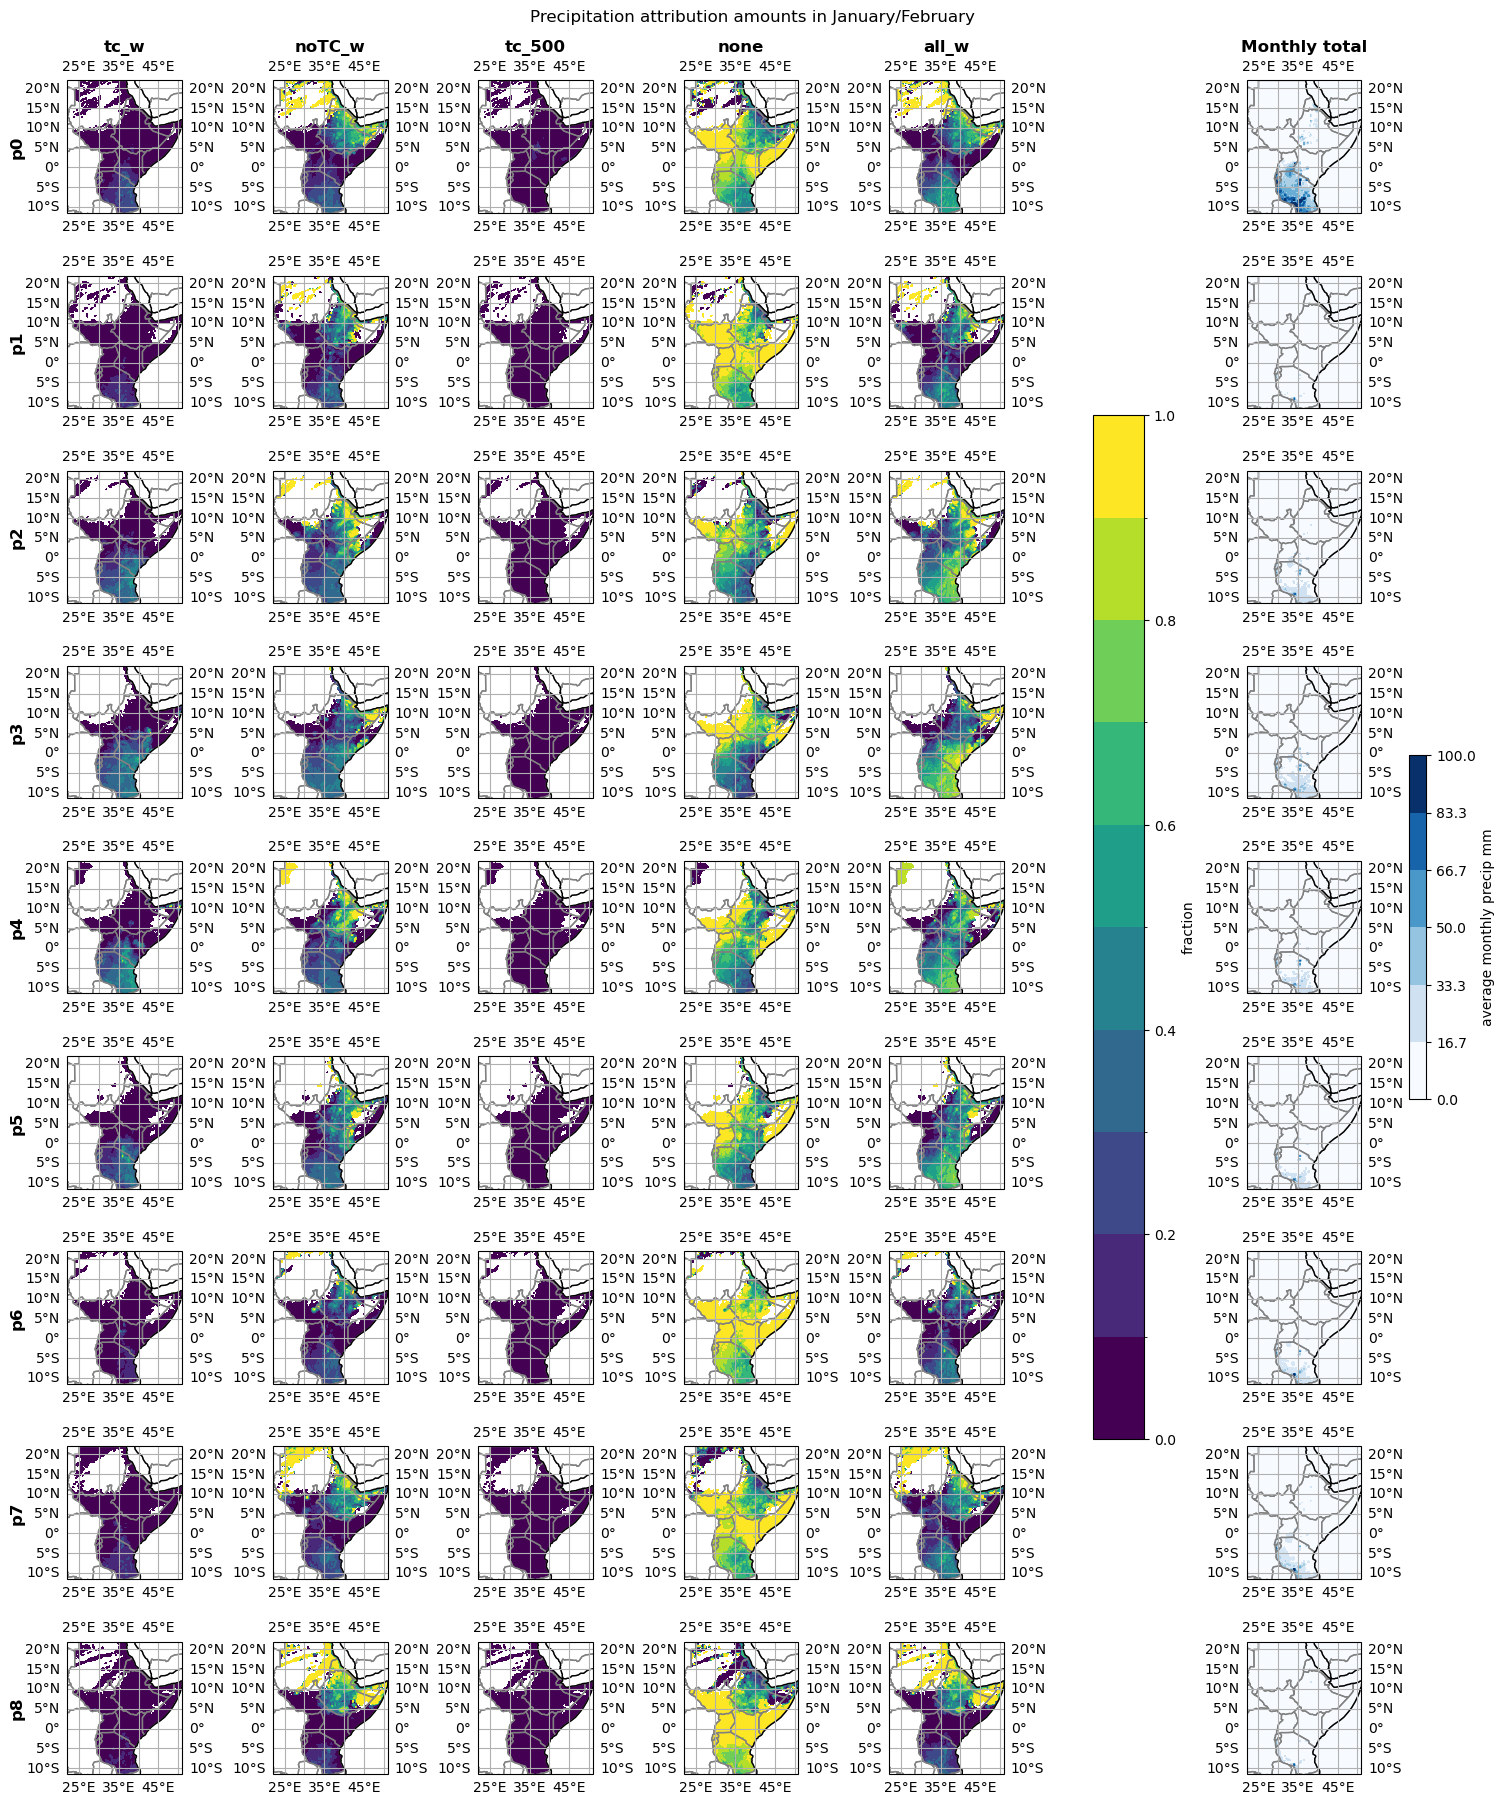

In [ ]:
monthsets = [[1,2].[3,4,5],[6,7,8,9],[10,11,12]]
months = np.arange(1,13)
for month in months:

    fig,axs = tct.new_map_axes(nrows=len(MJO_classVals),ncols=6,figsize=(15,len(MJO_classVals)*2))

    mjo = MJO_classVals
    mjoLong = mjo #["favourable","unfavourable","inactive"]
    att = ['tc_w', 'noTC_w', 'tc_500', 'none']

    # month=3
    cmap = plt.get_cmap('viridis')
    fracLevels = np.arange(0,1.05,0.1)

    if chartType == "amount":
        totalLabel = "average monthly precip mm"
        totalTitle = "Monthly total"
        totalVmax = 100
        suptitle="Precipitation attribution amounts in January/February"
    elif chartType == "wetDays":
        totalLabel = "average wet days per month"
        totalTitle = "Wet days"
        totalVmax=9
        suptitle="Attributed wet days (> 1mm) in January/February"
    else:
        raise ValueError("Wrong value to 'chartType'")
    saveLoc = f"{chartType}_region.attribution.{month:02}.png"

    for i in range(len(MJO_classVals)):
        for j in range(4):
            ax = axs[i,j]
            frac.sel(MJO_class=mjo[i],attribution=att[j]).plot.contourf(ax=ax,levels=fracLevels,add_colorbar=False,cmap=cmap)
            if i==0:
                ax.set_title(att[j],fontweight='bold')
            else:
                ax.set_title(None)
            if j == 0:
                ax.text(-0.5,0.5,mjoLong[i],transform=ax.transAxes,size=12,fontweight="bold",rotation=90,va="center")

        ax = axs[i,4]
        imFrac=westerly.sel(MJO_class=mjo[i]).plot.contourf(ax=ax,levels=fracLevels,add_colorbar=False,cmap=cmap)
        ax.set_title(None)

        ax = axs[i,5]
        imTot=total.sel(MJO_class=mjo[i]).plot.contourf(ax=ax,vmin=0,vmax=totalVmax,add_colorbar=False,cmap=plt.get_cmap("Blues"))
        ax.set_title(None)
    axs[0,5].set_title(totalTitle,fontweight='bold')

    axs[0,4].set_title('all_w',fontweight='bold')
    plt.colorbar(imFrac,ax=axs[:,:5],shrink=0.6,label="fraction")
    plt.colorbar(imTot,ax=axs[:,5],shrink=0.6,label=totalLabel)

    # tct.add_labels(axs,0.8,0.9,fontweight="bold")

    fig.suptitle(suptitle)

    # plt.savefig(f"{saveLoc}.png")
    # plt.savefig(f"{saveLoc}.pdf")

Check that the fracs add to 1

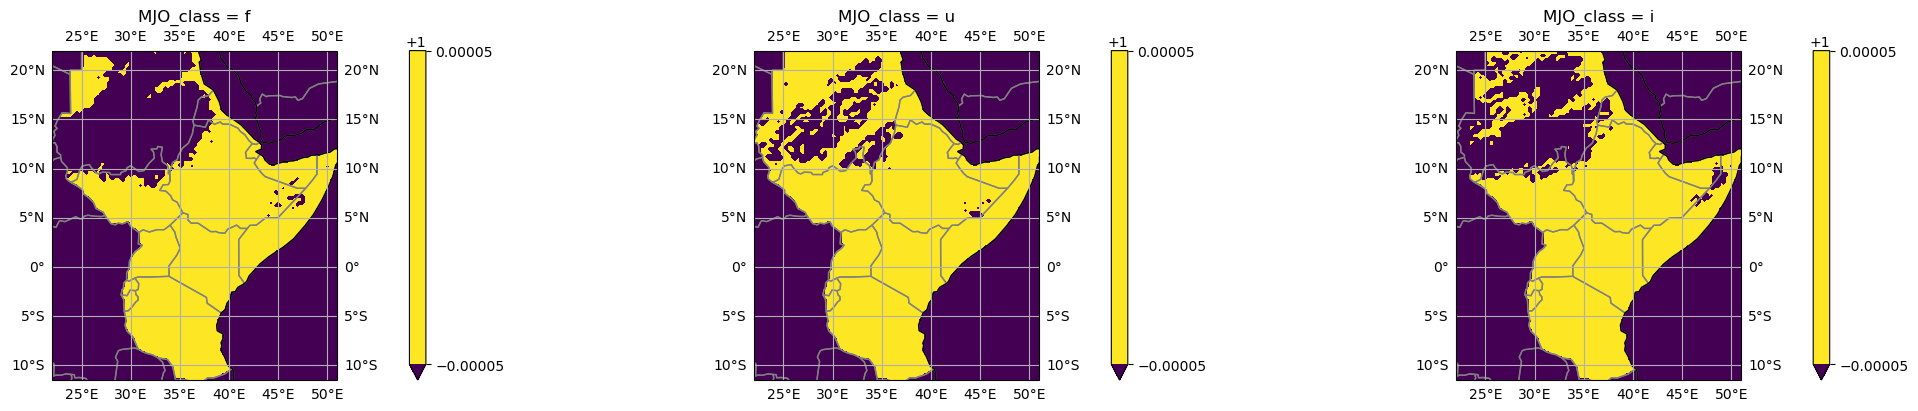

In [ ]:
fig,axs = tct.new_map_axes(nrows=1,ncols=3)

for i in range(len(mjo)):
    frac.sum(dim=["attribution"]).sel(MJO_class=mjo[i]).plot.contourf(ax=axs[i],levels=[0.99995,1.00005])

Calculate typical number of days in each MJO state per season

In [ ]:
# New column with the state of the MJO
sioState['MJO_state'] = pd.cut(sioState['MJO phase'],bins=[-0.5,0.5,1.5,4.5,8.5],labels=['i','u','f','u'],ordered=False)
sioState.head(30)

,time,RMM amplitude,RMM phase,MJO phase,tc count,min distance,count inside 500 km,MJO_state
0,1980-01-01,0.814303,3.895956,0.0,1.0,6.175459e+06,0.0,i
1,1980-01-02,0.705713,3.946428,0.0,1.0,5.776080e+06,0.0,i
2,1980-01-03,0.663776,4.071391,0.0,0.0,inf,0.0,i
3,1980-01-04,0.650896,4.425780,0.0,1.0,1.503866e+07,0.0,i
4,1980-01-05,0.857257,4.776086,0.0,2.0,1.996607e+06,0.0,i
5,1980-01-06,0.969876,4.856249,0.0,1.0,1.457416e+07,0.0,i
6,1980-01-07,0.774038,4.651489,0.0,1.0,1.423346e+07,0.0,i
7,1980-01-08,0.789401,4.321702,0.0,2.0,3.537202e+06,0.0,i
8,1980-01-09,0.822877,4.327049,0.0,1.0,1.325873e+07,0.0,i
9,1980-01-10,0.971900,4.340475,0.0,3.0,6.957932e+05,0.0,i


In [ ]:
# Now select the season
seasonSioState = sioState.loc[sioState['time'].dt.month.isin([1,2])]
seasonSioState

,time,RMM amplitude,RMM phase,MJO phase,tc count,min distance,count inside 500 km,MJO_state
0,1980-01-01,0.814303,3.895956,0.0,1.0,6.175459e+06,0.0,i
1,1980-01-02,0.705713,3.946428,0.0,1.0,5.776080e+06,0.0,i
2,1980-01-03,0.663776,4.071391,0.0,0.0,inf,0.0,i
3,1980-01-04,0.650896,4.425780,0.0,1.0,1.503866e+07,0.0,i
4,1980-01-05,0.857257,4.776086,0.0,2.0,1.996607e+06,0.0,i
...,...,...,...,...,...,...,...,...
15395,2022-02-24,1.161408,3.125288,4.0,3.0,9.041215e+05,0.0,f
15396,2022-02-25,1.049565,3.153538,4.0,3.0,8.574233e+06,0.0,f
15397,2022-02-26,0.859183,3.231903,0.0,2.0,9.451878e+06,0.0,i
15398,2022-02-27,0.861012,3.511723,0.0,1.0,1.471362e+07,0.0,i


In [ ]:
years = np.arange(1980,2023)
# Now we calculate the average days per year in each state
avgMJOStateDays = seasonSioState['MJO_state'].value_counts() / (len(years) * 2)
da = xr.DataArray(data=avgMJOStateDays.values,coords={'MJO_class':mjo})
da

<xarray.DataArray (MJO_class: 3)>
array([13.1744186 ,  9.3372093 ,  7.11627907])
Coordinates:
  * MJO_class  (MJO_class) <U1 'f' 'u' 'i'

In [ ]:
frac = seasonEEAdata / da
frac
# for letter in mjo:

#     frac.sel(MJO_class=[letter]).update( frac.sel(MJO_class=[letter])/ avgMJOStateDays[letter])

Text(0.5, 0.98, 'Attributed wet days (> 1mm) in January/February')

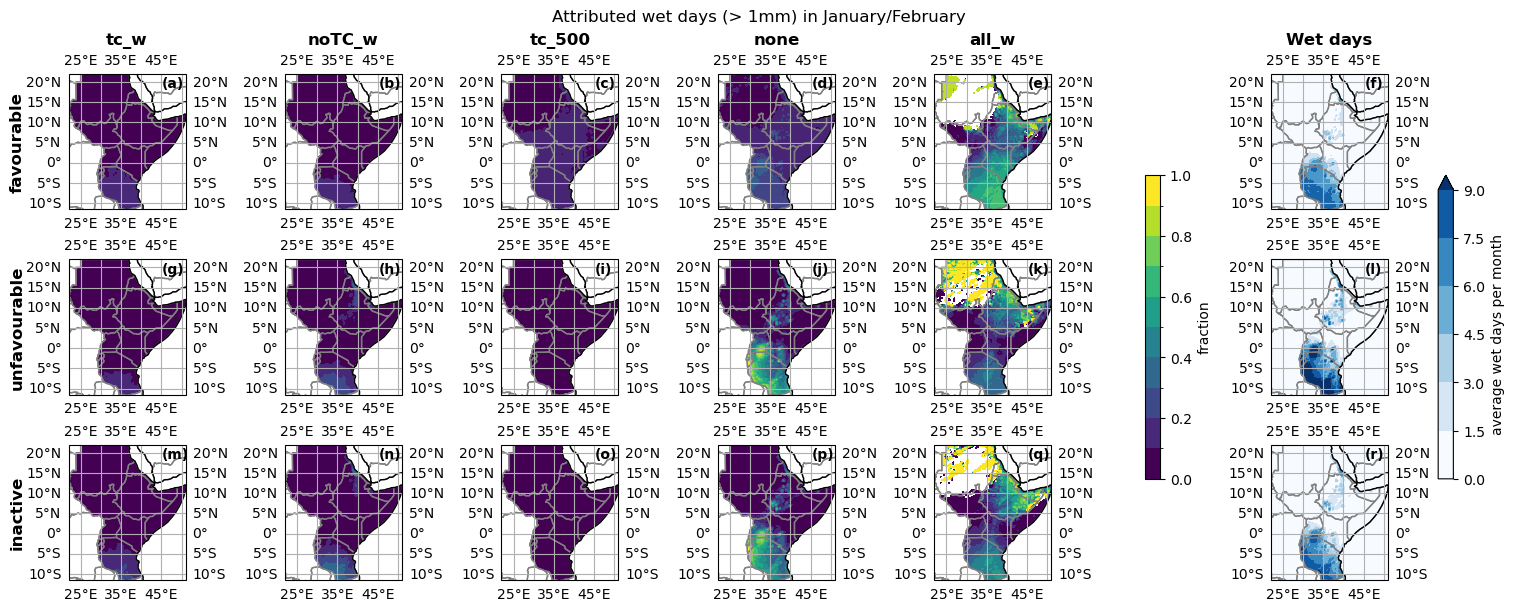

In [ ]:
fig,axs = tct.new_map_axes(nrows=3,ncols=6,figsize=(15,6))

mjo = ['f', 'u', 'i']
mjoLong = ["favourable","unfavourable","inactive"]
att = ['tc_w', 'noTC_w', 'tc_500', 'none']

month=2
cmap = plt.get_cmap('viridis')
fracLevels = np.arange(0,1.05,0.1)

if chartType == "amount":
    totalLabel = "average monthly precip mm"
    totalTitle = "Monthly total"
    totalVmax = 100
    suptitle="Precipitation attribution amounts in January/February"
elif chartType == "wetDays":
    totalLabel = "average wet days per month"
    totalTitle = "Wet days"
    totalVmax=9
    suptitle="Attributed wet days (> 1mm) in January/February"
else:
    raise ValueError("Wrong value to 'chartType'")
saveLoc = f"{chartType}_region.attribution.JF"

for i in range(3):
    for j in range(4):
        ax = axs[i,j]
        frac.sel(MJO_class=mjo[i],attribution=att[j]).plot.contourf(ax=ax,levels=fracLevels,add_colorbar=False,cmap=cmap)
        if i==0:
            ax.set_title(att[j],fontweight='bold')
        else:
            ax.set_title(None)
        if j == 0:
            ax.text(-0.5,0.5,mjoLong[i],transform=ax.transAxes,size=12,fontweight="bold",rotation=90,va="center")

    ax = axs[i,4]
    imFrac=westerly.sel(MJO_class=mjo[i]).plot.contourf(ax=ax,levels=fracLevels,add_colorbar=False,cmap=cmap)
    ax.set_title(None)

    ax = axs[i,5]
    imTot=total.sel(MJO_class=mjo[i]).plot.contourf(ax=ax,vmin=0,vmax=totalVmax,add_colorbar=False,cmap=plt.get_cmap("Blues"))
    ax.set_title(None)
axs[0,5].set_title(totalTitle,fontweight='bold')

axs[0,4].set_title('all_w',fontweight='bold')
plt.colorbar(imFrac,ax=axs[:,:5],shrink=0.6,label="fraction")
plt.colorbar(imTot,ax=axs[:,5],shrink=0.6,label=totalLabel)

tct.add_labels(axs,0.8,0.9,fontweight="bold")

fig.suptitle(suptitle)

In [ ]:
total

<xarray.DataArray (MJO_class: 3, latitude: 135, longitude: 117)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * longitude  (longitude) float32 22.0 22.25 22.5 22.75 ... 50.5 50.75 51.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... -11.0 -11.25 -11.5
  * MJO_class  (MJO_class) object 'f' 'u' 'i'

In [ ]:
data

<xarray.DataArray (month: 5, MJO_class: 9, attribution: 4, latitude: 309,
                   longitude: 497)>
array([[[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

         [[5.76413516e-03, 7.29724532e-03, 7.23750284e-03, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [8.99851602e-03, 9.69406310e-03, 9.36438702e-03, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [9.72431153e-03, 1.01577071e-02, 1.01443082e-02, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

         [[3.91594786e-03, 3.77653423e-03, 3.57571314e-03, ...,
           7.25973950e-05, 5.43601564e-05, 0.00000000e+00],
          [3.28322197e-03, 3.35022295e-03, 3.03511182e-03, ...,
           6.36765326e-05, 0.00000000e+00, 0.00000000e+00],
          [2.77973572e-03, 2.79643340e-03, 2.57276138e-03, ...,
           1.27362859e-04, 1.17284726e-04, 5.10203317e-05],
          ...,
          [4.99825412e-03, 6.38609240e-03, 5.99890668e-03, ...,
           2.30472395e-03, 2.61904066e-03, 2.75562378e-03],
          [5.47787687e-03, 7.19714770e-03, 7.45820720e-03, ...,
           2.62175919e-03, 3.13131441e-03, 3.22072022e-03],
          [7.08089862e-03, 7.79333105e-03, 8.30573868e-03, ...,
           3.10999132e-03, 3.19386949e-03, 3.60713387e-03]]]]],
      dtype=float32)
Coordinates:
  * longitude    (longitude) float32 -22.0 -21.75 -21.5 ... 101.5 101.8 102.0
  * latitude     (latitude) float32 40.0 39.75 39.5 39.25 ... -36.5 -36.75 -37.0
  * attribution  (attribution) <U6 'tc_w' 'noTC_w' 'tc_500' 'none'
  * MJO_class    (MJO_class) object 'p0' 'p1' 'p2' 'p3' 'p4' 'p5' 'p6' 'p7' 'p8'
  * month        (month) int64 1 2 3 4 5